# **Lead Optimization Model: Machine Learning-driven Approach for Predicting Hot Leads**

## Abstract

The project focuses on optimizing lead conversion by utilizing Machine learning models to assign lead scores. The lead score will serve as a measure of conversion likelihood, with higher scores indicating hot leads that are more likely to convert and lower scores indicating cold leads that have a lower chance of conversion.

To achieve this, the project incorporates various machine learning concepts and techniques, including data representation and preprocessing, different types of learning (supervised, unsupervised, and semi-supervised), regression and classification algorithms, clustering techniques, and accuracy metrics such as precision, recall, F1-score, total accuracy, MSE, and MAPE.

The initial step involves data preprocessing and feature engineering, ensuring the dataset is properly cleaned, missing values are handled, and categorical variables are appropriately encoded. Subsequently, the logistic regression model is trained on the dataset to predict lead conversion probabilities and assign lead scores. The project also addresses the requirement for adaptability by considering potential future changes.

Furthermore, the project covers additional machine learning algorithms such as linear regression, non-linear regression with regularization, Bayesian and Naive Bayes classification, support vector machines (SVM) for both linear and non-linear tasks, decision trees, random forests, and neural networks. These algorithms are explored, evaluated, and compared to ensure the chosen model is the most suitable for lead scoring and conversion optimization in the context of the Sales Data.

The overall goal is to develop a robust lead scoring model that accurately identifies potential leads with high conversion probabilities. By targeting these hot leads, the company can maximize their resources and optimize the lead conversion process, resulting in improved sales performance and revenue growth.

## Problem Statement

Many businesses encounter a significant influx of leads from diverse channels, including website forms, referrals, and marketing campaigns. Nevertheless, the conversion rate of these leads into paying customers often remains suboptimal. To enhance conversion efficiency, businesses strive to identify the most promising leads, commonly known as 'Hot Leads,' who exhibit a greater likelihood of conversion. This entails implementing strategies to effectively identify, prioritize, and nurture leads with the highest potential for conversion. By focusing resources and efforts on these Hot Leads, businesses can significantly improve their overall lead conversion rate, resulting in increased sales and revenue growth.



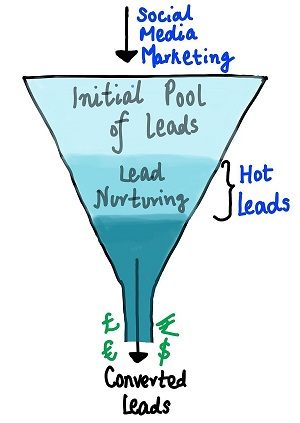

## Objective

**The objective is to develop a machine learning model that assigns a lead score to each potential Customer.** 

The lead score will help to identify and target the most promising leads, with higher scores indicating a higher likelihood of conversion. Conversely, lower scores will signify leads that are less likely to convert. This model will enable businesses to allocate their sales efforts more efficiently, maximizing the likelihood of conversion and achieving higher overall conversion rates.The model should be adaptable to future changes and accommodate additional problems or adjustments that may arise.

## Dataset

In this project, we are working with a sourced lead dataset containing approximately 9000 data points. There are a total of 31 fields (variables). The dataset comprises several attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, among others. These attributes may play a role in determining whether a lead will be converted into a customer or not. The target variable, labeled as **'Converted'**, indicates whether a past lead was converted (1) or not (0). By analyzing and modeling this dataset, we aim to uncover the important factors that contribute to lead conversion and build predictive models that can accurately identify potential conversions.

Overview of Dataset:


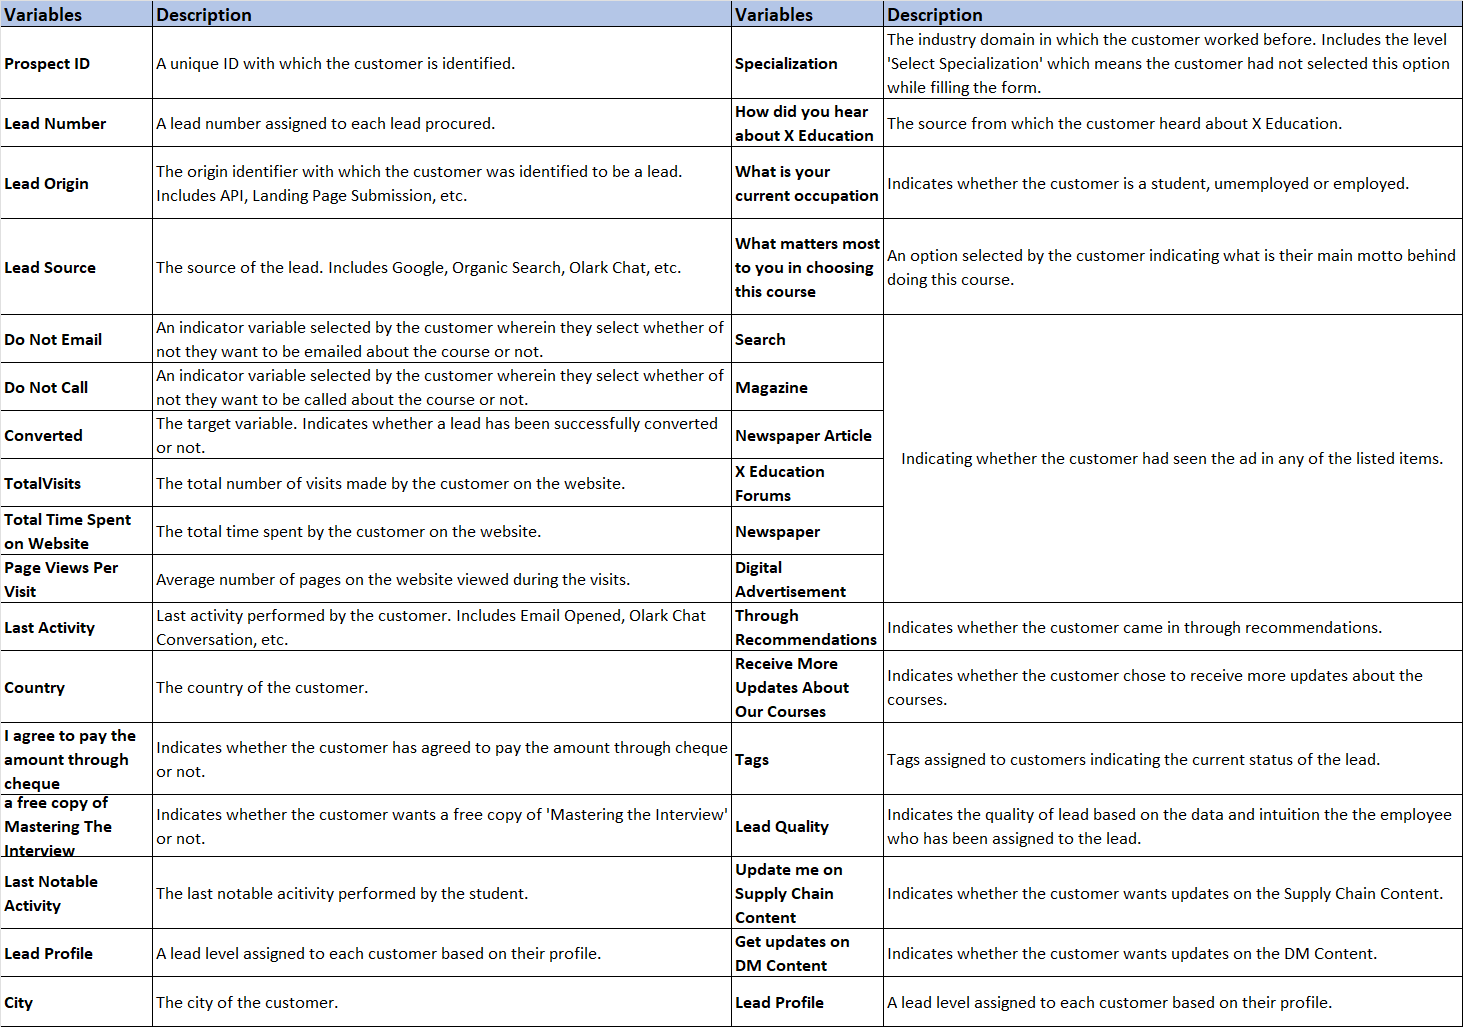

## Implementation

#### 1. Data Preprocessing:
   - Perform data cleaning, handling missing values, and outlier detection using appropriate techniques.
   - Apply feature scaling or normalization to ensure consistent ranges for different variables.
   - Explore and transform variables to meet assumptions of regression, classification, or clustering algorithms.
   
#### 2. Data Split and Cross-Validation:
   - Split the preprocessed dataset into training and testing sets for regression, classification, or clustering tasks.
   - Implement cross-validation techniques like k-fold or stratified cross-validation to assess model performance.

#### 3. Regression Models:
   - Implement linear regression and explore non-linear regression techniques such as polynomial regression or decision tree regression.
   - Apply regularization techniques like L1 (Lasso) or L2 (Ridge) regularization to control model complexity and handle overfitting.
   - Evaluate regression models using metrics like mean squared error (MSE), mean absolute percentage error (MAPE), or R-squared.

#### 4. Classification Models:
   - Build logistic regression models for lead scoring and probability estimation.
   - Incorporate regularization techniques like L1 or L2 regularization to improve model performance and handle feature selection.
   - Explore Bayesian and Naive Bayes classification algorithms and assess their suitability for the problem.
   - Utilize support vector machines (SVM) with linear and non-linear kernels for classification tasks.

#### 5. Clustering Models:
   - Apply K-means clustering algorithm to identify potential customer segments based on lead characteristics.
   - Implement expectation maximization (EM) algorithm for clustering with probabilistic models.
   - Utilize DBScan for density-based clustering and handling noise in the data.

#### 6. Evaluation Metrics:
   - Calculate accuracy, precision, recall, F1-score, and total accuracy for classification models.
   - Assess regression models using metrics like MSE, MAPE, or other appropriate regression evaluation metrics.
   - Evaluate clustering models using metrics like silhouette score or within-cluster sum of squares (WCSS).

#### 7. Parameter Tuning:
   - Perform grid search or random search for hyperparameter tuning in regression, classification, or clustering algorithms.
   - Optimize hyperparameters for models like SVM, decision trees, random forests, or neural networks.
   - Use techniques like gradient descent (GD) or closed-form solutions for optimization in linear regression or non-linear regression models.

#### 8. Comparison and Selection:
   - Compare the performance of different models based on evaluation metrics.
   - Select the best-performing model for lead scoring, probability estimation, or customer segmentation.

## 1. Data Preprocessing

### 1.1 Read the Data

In [46]:
# Import the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.feature_selection import RFE

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Load the dataset
df = pd.read_csv('Leads.csv')

### 1.2 Understand the Data

In [48]:
# Display the first few rows of the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [49]:
# Check the dimensions of the dataset (rows, columns)
df.shape

(9240, 37)

In [50]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [51]:
# Check the summary statistics of numerical columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [52]:
# Check the distribution of the target variable
print(df['Converted'].value_counts())

0    5679
1    3561
Name: Converted, dtype: int64


### 1.3 Data Cleaning

In [53]:
# Identify Columns with missing values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [54]:
# Calculate the percentage of null values in each column
round(100 * (df.isnull().sum() / len(df)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##### It can be identified, there exists few columns with very higher proportions of null values. Let's handle these values by either dropping or imputing with other central values.

Let's drop the columns which comprises of more than 40% null values

In [55]:
# Identify columns with 40% or above missing values
null_percentage = round((df.isnull().sum() / len(df.index)) * 100, 2)
columns_to_drop = null_percentage[null_percentage >= 40].index
print(columns_to_drop)

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [56]:
# Drop columns with 40% or above missing values
df = df.drop(columns_to_drop, axis=1)

In [57]:
# Check the shape of update dataset
df.shape

(9240, 32)

In [58]:
# Find the unique values in each column
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

##### We can drop the "Prospect ID" and "Lead Number" columns, as they do not provide any meaningful information for our further analysis or modeling process. These columns typically serve as identifiers or tracking numbers and may not contribute directly to predicting lead conversion.

###### We could also see from the output that there are few columns which has only 1 unique value with no null values. So, we can drop them as they wont contribute much to the model.

Let's Drop the specified columns, including "Prospect ID", "Lead Number", "Magazine", "Receive More Updates About Our Courses", "I agree to pay the amount through cheque", "Get updates on DM Content", and "Update me on Supply Chain Content"

In [59]:
df= df.drop(['Prospect ID', 'Lead Number', 'Magazine', 'Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content', 'Lead Profile'], axis=1)

In [60]:
# Check for the missing values in the updated dataset
round((df.isnull().sum() / len(df)) * 100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

##### Still, There exists columns with significantly higher misssing values. Let's handle these columns by imputing with meaningful numerical or categorical values.

Let's deal with each column indiidually to better understand the distribution of data.